Very quick demo of the standard surrogate algorithms, operating on a one dimensional vector in Julia.

In [1]:
using CSV, DataFrames, Plots

Annual historical sunspot numbers from 1700 to present. Data obtained from http://sidc.be/silso/infosnytot on May 3 2021.

In [2]:
sunspots=CSV.read("SN_y_tot_V2.0.csv", DataFrame,header=["year", "total", "std. dev.","num. obs.","definitive"] )

,year,total,std. dev.,num. obs.,definitive
,Float64,Float64,Float64,Int64,Int64
1,1700.5,8.3,-1.0,-1,1
2,1701.5,18.3,-1.0,-1,1
3,1702.5,26.7,-1.0,-1,1
4,1703.5,38.3,-1.0,-1,1
5,1704.5,60.0,-1.0,-1,1
6,1705.5,96.7,-1.0,-1,1
7,1706.5,48.3,-1.0,-1,1
8,1707.5,33.3,-1.0,-1,1
9,1708.5,16.7,-1.0,-1,1


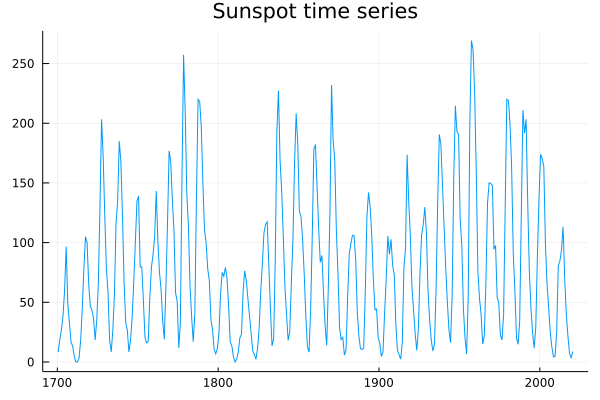

In [3]:
plot(sunspots.year,sunspots.total,legend=false, title="Sunspot time series")

In [4]:
z=sunspots.total;

In [5]:
using Random, FFTW

In [6]:
function surrogate_alg0(z)
    return shuffle(z) #OK, this one is too easy.
end

surrogate_alg0 (generic function with 1 method)

This one is only very slightly more difficult - just keep track of the length of the real vector for the appropriate inverse ``irfft``

In [7]:
function surrogate_alg1(z)
    fz  = rfft(z) 
    phi = exp.(rand(length(fz))*pi)
    return irfft(fz.*phi, length(z)) 
end

surrogate_alg1 (generic function with 1 method)

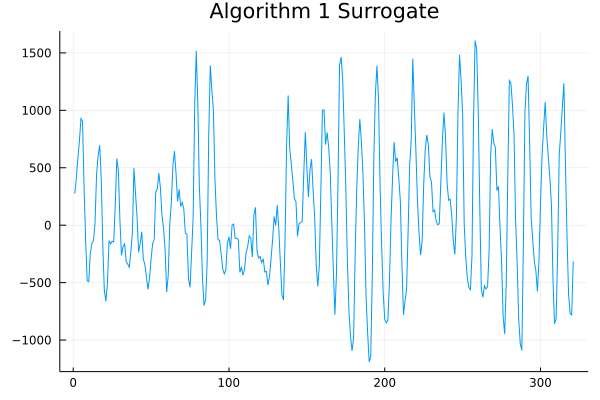

In [8]:
plot(surrogate_alg1(z),legend=false, title="Algorithm 1 Surrogate")

The algorithm2 (AAFT) algorithm is a little more subtle - to make it as clear as possible, we first create the reordering routine - ``x `` is reordered to have the same rank ordering as ``y``

In [9]:
function reorder(x,y) #shuffle x into the same rank ordering as y - both 1-d arrays
    rz=zeros(length(y))
    idx=sortperm(y)
    rz[idx]=sort(x)
    return rz
end

reorder (generic function with 1 method)

In [10]:
function surrogate_alg2(z)
    g=randn(length(z))
    gs=reorder(g,z)
    gs=surrogate_alg1(gs)
    zs=reorder(z,gs)
    return zs
end

surrogate_alg2 (generic function with 1 method)

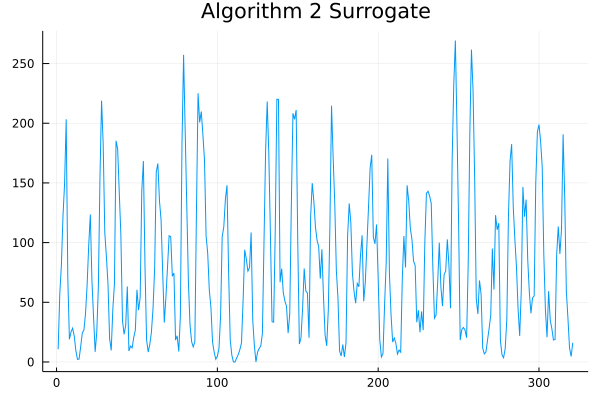

In [11]:
plot(surrogate_alg2(z),legend=false, title="Algorithm 2 Surrogate")

And, that's all folks.

## Michael Small, 3/5/21